# import libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
import warnings
warnings.filterwarnings("ignore")

# import data

In [149]:
df = pd.read_csv("loan.csv")

In [150]:
df.shape

(39717, 111)

In [151]:
total_no_of_rows= len(df)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [153]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data cleaning

## Removing duplicate rows

**Removing duplicates rows with same id**

In [157]:
len(df)

39717

In [158]:
df = df.drop_duplicates(subset=['id','member_id','url'], inplace=False)

In [159]:
len(df)

39717

## Removing irrelevant rows and columns

**Filtering dataframe to consider only Full paid and Charged off**.
`The loans which are currenyly active are not used in the process for EDA` 

In [160]:
df = df[ df["loan_status"].isin(["Charged Off","Fully Paid"]) ]

**Removing columns with more than 85% null values**



In [161]:
nullcountofallcolumns= df.isnull().sum()

In [162]:
nullcountofallcolumns.index

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [163]:
nullcountofallcolumns.values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  2386,  1033,     0,     0,     0,     0,     0,     0,
           0, 12527,     0,    11,     0,     0,     0,     0,     0,
           0, 24905, 35837,     0,     0,     0,    50,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
          71,     0, 38577,     2,    56, 38577,     0,     0, 38577,
       38577, 38577,     0, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577,    56,     0, 38577,
       38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577, 38577,
       38577, 38577, 38577, 38577, 38577, 38577,   697,    39, 38577,
       38577, 38577, 38577])

In [164]:
nullratioofallcolumns = nullcountofallcolumns.values / total_no_of_rows

In [165]:
nullratioofallcolumns

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.00750308e-02, 2.60090138e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.15406501e-01,
       0.00000000e+00, 2.76959488e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.27061460e-01, 9.02308835e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.25890677e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.78764761e-03, 0.00000000e+00, 9.71296926e-01,
       5.03562706e-05, 1.40997558e-03, 9.71296926e-01, 0.00000000e+00,
       0.00000000e+00, 9.71296926e-01, 9.71296926e-01, 9.71296926e-01,
      

In [166]:
nullratioofallcolumns <= 0.85

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False])

In [167]:
df = df.iloc[:,nullratioofallcolumns <= 0.85]

**Remaining data size**

In [169]:
df.shape

(38577, 55)

**Removing columns who only carry 1 unique value**
`These columns are redundant for our analysis`
Ex:- Some columns carry only 0

In [170]:
for i in df.columns:
  if(df[ df[i].notnull() ][i].unique().size==1):
    df=df.drop(i,axis=1)

In [171]:
df.shape

(38577, 44)

In [172]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

**Removing the unnecessary columns who are neither buyer behaviour nor loan chracterstics**
`For Exam:- Loan Desciption is carrying english sentence which cant be analysed for EDA`

In [174]:
unnessary_columns= ["emp_title","url","desc","title" , "id","member_id","loan_amnt", "funded_amnt",
     "total_pymnt_inv", "collection_recovery_fee"]

In [175]:
df = df.drop(unnessary_columns,axis=1)

In [176]:
df.shape

(38577, 34)

In [177]:
df.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Correcting data types of columns

**Printing first 5 values to have an idea of the data for each column**

In [178]:
df.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,9,5863.155187,5000.00,863.16,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,4,1008.710000,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,10,3005.666844,2400.00,605.67,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,37,12231.890000,10000.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0
5,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,12,5632.210000,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.0


**checking datatype for each column**

In [179]:
df.dtypes

funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
total_pymnt               float64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late_fee        float64
recoveries    

**Taking only numerical part from term column and saving it in integer datatype**

In [180]:
df.term = df["term"].apply(lambda x : int(x[0:3]))

**removing chracters from revol_util and convert it into a float value**

In [181]:
df['revol_util'] = (df['revol_util'].str.strip('years +<>%')).astype(np.float64)

**removing chracters from emp_length and convert it into a float value**

In [182]:
df['emp_length'] = df['emp_length'].str.strip('years +<>')

**removing % from end of int_rate and convert it into a float value**

In [183]:
df.int_rate = df["int_rate"].apply(lambda x : float(x[:-1]))

## Derive new columns

**Deriving issue_month and issue_year from issue_date**

In [184]:
df.issue_d.value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [185]:
df["issue_month"] = df["issue_d"].apply( lambda x: str(x[0:3]))

In [186]:
df["issue_month"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Dec
1        Dec
2        Dec
3        Dec
5        Dec
        ... 
39712    Jul
39713    Jul
39714    Jul
39715    Jul
39716    Jun
Name: issue_month, Length: 38577, dtype: object>

In [187]:
df["issue_year"] = df["issue_d"].apply( lambda x: int(x[4:])+2000)

In [188]:
df["issue_year"].value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

## Removing outliers

In [189]:
df.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year'],
      dtype='object')

**Plotting bar plot to detect outliers for some columns**

(38577, 36)


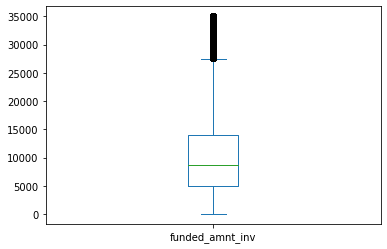

In [190]:
# oulier detection for funded_amnt_inv start
df["funded_amnt_inv"].plot.box()
print(df.shape)

# oulier detection for funded_amnt_inv end

(38577, 36)


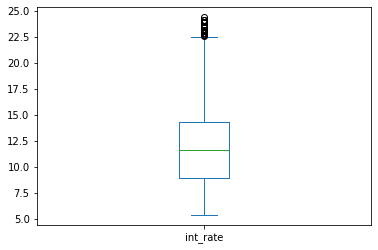

In [191]:
# oulier detection for int_rate start
df["int_rate"].plot.box()
print(df.shape)

# oulier detection for int_rate end

(38577, 36)


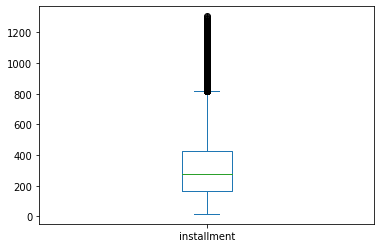

In [192]:
# oulier detection for installment start
df["installment"].plot.box()
print(df.shape)

# oulier detection for installment end

(38577, 36)


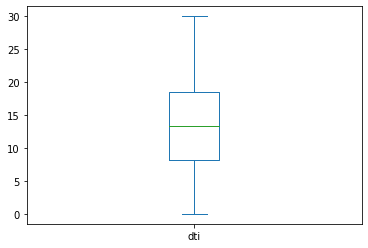

In [193]:
# oulier detection for dti start
df["dti"].plot.box()
print(df.shape)

# oulier detection for dti end

**Choosing those column who are having more ouliers**

In [194]:
lower_quartile = df[["funded_amnt_inv","int_rate","installment"]].quantile(0.10)
higher_quartile = df[["funded_amnt_inv","int_rate","installment"]].quantile(0.90)
print(lower_quartile)
print(higher_quartile)



funded_amnt_inv    2825.00
int_rate              7.14
installment          98.99
Name: 0.1, dtype: float64
funded_amnt_inv    19975.00
int_rate              16.82
installment          620.90
Name: 0.9, dtype: float64


In [195]:
df.shape

(38577, 36)

Applying percentile filter to remove outliers

In [196]:
df = df[ (df["funded_amnt_inv"] >= lower_quartile["funded_amnt_inv"]) & (df["funded_amnt_inv"] <= higher_quartile["funded_amnt_inv"])]
df = df[ (df["int_rate"] >= lower_quartile["int_rate"]) & (df["int_rate"] <= higher_quartile["int_rate"])]
df = df[ (df["installment"] >= lower_quartile["installment"]) & (df["installment"] <= higher_quartile["installment"])]

In [197]:
df.shape

(23348, 36)

# Univariate Analysis and Segmented Univariate Analysis for different variables

In [198]:
df.dtypes

funded_amnt_inv           float64
term                        int64
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
total_pymnt               float64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late_fee        float64
recoveries    

In [199]:
alls = df[df["loan_status"] !="Current" ];
co = df[df["loan_status"]=="Charged Off" ];
fp = df[df["loan_status"]=="Fully Paid" ];

**Analysis of open account variable**

          defaulted   all  ratio    indexx
open_acc                                  
(4, 8]         1190  9038   13.0    (4, 8]
(8, 12]         939  7034   13.0   (8, 12]
(12, 16]        434  3219   13.0  (12, 16]
(0, 4]          368  2614   14.0    (0, 4]
(16, 20]        143  1091   13.0  (16, 20]
(20, 24]         39   304   13.0  (20, 24]
(24, 28]          2    34    6.0  (24, 28]
(28, 32]          1    11    9.0  (28, 32]
(32, 36]          0     2    0.0  (32, 36]
(36, 40]          0     0    NaN  (36, 40]


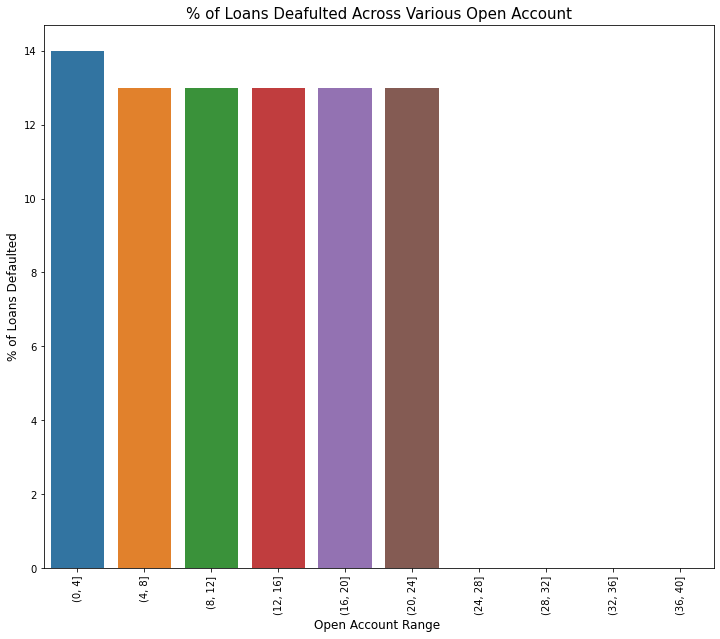

In [200]:
#open_acc start
open_acc =  alls[  alls["open_acc"].notnull()]


open_acc_bins = [x for x in range(0,44,4)]
open_acc_defaulted = open_acc[open_acc["loan_status"]=="Charged Off"].groupby(by = [pd.cut(open_acc[open_acc["loan_status"]=="Charged Off"]['open_acc'], open_acc_bins)]).size().sort_values(ascending=False)
open_acc_all =  open_acc.groupby (by= [pd.cut(open_acc['open_acc'], open_acc_bins)]).size().sort_values(ascending=False)

open_acc_df = pd.concat([open_acc_defaulted, open_acc_all], axis=1)
open_acc_df.columns = ["defaulted","all"]


open_acc_df["ratio"] = open_acc_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)
open_acc_df["indexx"] = open_acc_df.index

open_acc_th = 150

print(open_acc_df)

#open_acc_df[ open_acc_df["all"] > open_acc_th  ]["ratio"].sort_values(ascending=False).plot.bar()

open_acc_df = open_acc_df[ open_acc_df["all"] > open_acc_th  ]

plt.figure(figsize=[12,10])
plt.xticks(rotation=90)
sns.barplot(data = open_acc_df, x="indexx" , y="ratio" )
plt.title("% of Loans Deafulted Across Various Open Account", fontsize=15)
plt.xlabel("Open Account Range ", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.show()

#open_acc end

**Analysis of annual income variable**

                  defaulted   all  ratio            indexx
annual_inc                                                
(0, 15000]               43   181   24.0        (0, 15000]
(15000, 30000]          444  2516   18.0    (15000, 30000]
(30000, 45000]          838  5393   16.0    (30000, 45000]
(45000, 60000]          780  5525   14.0    (45000, 60000]
(60000, 75000]          437  3733   12.0    (60000, 75000]
(75000, 90000]          237  2273   10.0    (75000, 90000]
(90000, 105000]         127  1422    9.0   (90000, 105000]
(105000, 120000]         77   914    8.0  (105000, 120000]
(120000, 135000]         46   467   10.0  (120000, 135000]
(135000, 150000]         33   324   10.0  (135000, 150000]
(150000, 165000]         18   152   12.0  (150000, 165000]
(165000, 180000]         10   132    8.0  (165000, 180000]
(180000, 195000]          5    44   11.0  (180000, 195000]


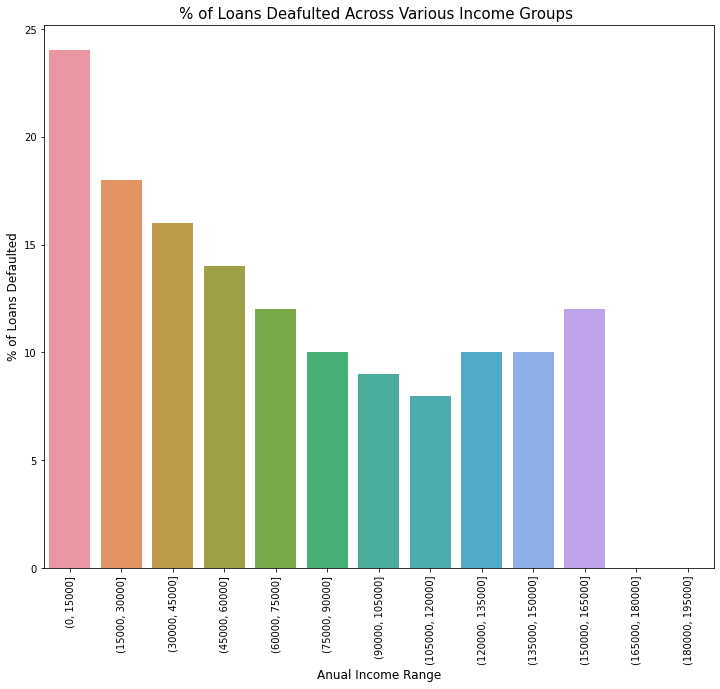

In [201]:

#annual_inc start
annual_inc =  alls[  alls["annual_inc"].notnull()]


annual_inc_bins = [x for x in range(0,200000,15000)]
annual_inc_defaulted = annual_inc[annual_inc["loan_status"]=="Charged Off"].groupby(by = [pd.cut(annual_inc[annual_inc["loan_status"]=="Charged Off"]['annual_inc'], annual_inc_bins)]).size().sort_values(ascending=False)
annual_inc_all =  annual_inc.groupby (by= [pd.cut(annual_inc['annual_inc'], annual_inc_bins)]).size().sort_values(ascending=False)

annual_inc_df = pd.concat([annual_inc_defaulted, annual_inc_all], axis=1)
annual_inc_df.columns = ["defaulted","all"]


annual_inc_df["ratio"] = annual_inc_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)
annual_inc_df["indexx"] = annual_inc_df.index

annual_inc_th = 150

print(annual_inc_df)

#annual_inc_df[ annual_inc_df["all"] > annual_inc_th  ]["ratio"].sort_values(ascending=False).plot.bar()

annual_inc_df = annual_inc_df[ annual_inc_df["all"] > annual_inc_th  ]

plt.figure(figsize=[12,10])
plt.xticks(rotation=90)
sns.barplot(data = annual_inc_df, x="indexx" , y="ratio" )
plt.title("% of Loans Deafulted Across Various Income Groups ", fontsize=15)
plt.xlabel("Anual Income Range", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.show()

#annual_inc end

**Analysis of interest variable variable**

          defaulted   all  ratio    indexx
int_rate                                  
(6, 8]          196  3535    6.0    (6, 8]
(8, 10]         289  3190    9.0   (8, 10]
(10, 12]        758  6089   12.0  (10, 12]
(12, 14]        820  5403   15.0  (12, 14]
(14, 16]        763  3905   20.0  (14, 16]
(16, 18]        290  1226   24.0  (16, 18]


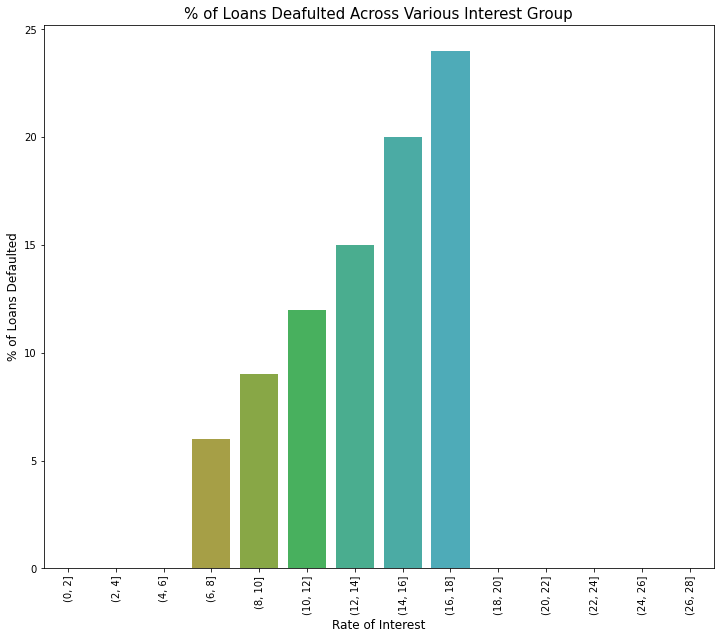

In [202]:


#int_rate start
int_rate =  alls[  alls["int_rate"].notnull()]


int_rate_bins = [x for x in range(0,30,2)]
int_rate_defaulted = int_rate[int_rate["loan_status"]=="Charged Off"].groupby(by = [pd.cut(int_rate[int_rate["loan_status"]=="Charged Off"]['int_rate'], int_rate_bins)]).size().sort_values(ascending=False)
int_rate_all =  int_rate.groupby (by= [pd.cut(int_rate['int_rate'], int_rate_bins)]).size().sort_values(ascending=False)

int_rate_df = pd.concat([int_rate_defaulted, int_rate_all], axis=1)
int_rate_df.columns = ["defaulted","all"]

int_rate_th = 200

int_rate_df = int_rate_df[ int_rate_df["all"] > int_rate_th  ]

int_rate_df["ratio"] = int_rate_df[ ["defaulted","all"] ].apply(lambda x: (round((x[0]/x[1])*100,0)) , axis=1)
int_rate_df["indexx"] = int_rate_df.index

#int_rate_th = 200

print(int_rate_df)

#int_rate_df[ int_rate_df["all"] > int_rate_th  ]["ratio"].sort_values(ascending=False).plot.bar()

#int_rate_df = int_rate_df[ int_rate_df["all"] > int_rate_th  ]

plt.figure(figsize=[12,10])
plt.xticks(rotation=90)
sns.barplot(data = int_rate_df, x="indexx" , y="ratio" )
plt.title("% of Loans Deafulted Across Various Interest Group", fontsize=15)
plt.xlabel("Rate of Interest", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.show()


#int_rate end

**Analysis of DTI variable**

          defaulted   all  ratio    indexx
dti                                       
(0, 2]          107   920   12.0    (0, 2]
(2, 4]          139  1135   12.0    (2, 4]
(4, 6]          160  1492   11.0    (4, 6]
(6, 8]          205  1818   11.0    (6, 8]
(8, 10]         262  2108   12.0   (8, 10]
(10, 12]        270  2290   12.0  (10, 12]
(12, 14]        328  2400   14.0  (12, 14]
(14, 16]        314  2336   13.0  (14, 16]
(16, 18]        309  2210   14.0  (16, 18]
(18, 20]        305  2055   15.0  (18, 20]
(20, 22]        276  1787   15.0  (20, 22]
(22, 24]        265  1638   16.0  (22, 24]
(24, 26]        123   780   16.0  (24, 26]


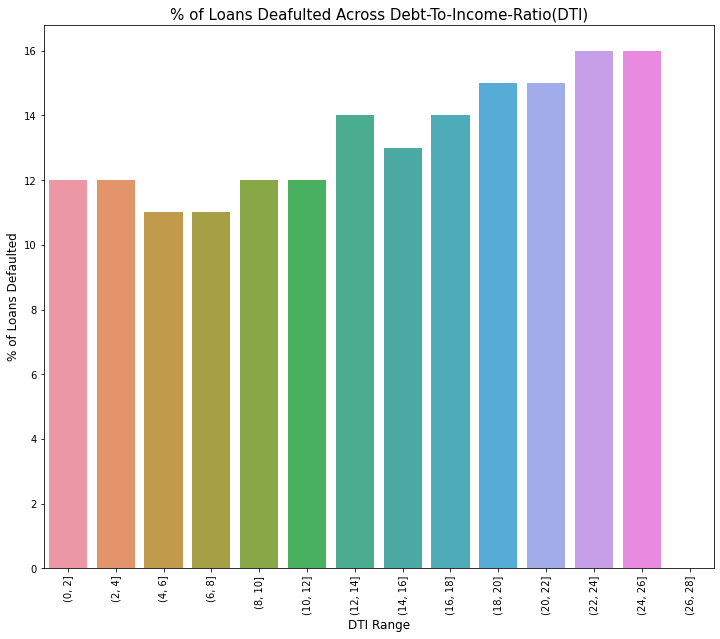

In [203]:


#dti start
dti =  alls[  alls["dti"].notnull()]


dti_bins = [x for x in range(0,30,2)]
dti_defaulted = dti[dti["loan_status"]=="Charged Off"].groupby(by = [pd.cut(dti[dti["loan_status"]=="Charged Off"]['dti'], dti_bins)]).size().sort_values(ascending=False)
dti_all =  dti.groupby (by= [pd.cut(dti['dti'], dti_bins)]).size().sort_values(ascending=False)

dti_df = pd.concat([dti_defaulted, dti_all], axis=1)
dti_df.columns = ["defaulted","all"]

dti_th = 400

dti_df = dti_df[ dti_df["all"] > dti_th  ]

dti_df["ratio"] = dti_df[ ["defaulted","all"] ].apply(lambda x: (round((x[0]/x[1])*100,0)) , axis=1)
dti_df["indexx"] = dti_df.index

#dti_th = 200

print(dti_df)

#dti_df[ dti_df["all"] > dti_th  ]["ratio"].sort_values(ascending=False).plot.bar()

#dti_df = dti_df[ dti_df["all"] > dti_th  ]

plt.figure(figsize=[12,10])
plt.xticks(rotation=90)
sns.barplot(data = dti_df, x="indexx" , y="ratio" )
plt.title("% of Loans Deafulted Across Debt-To-Income-Ratio(DTI)", fontsize=15)
plt.xlabel("DTI Range", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.show()


#dti end

**Analysis of funded amount variable**

                 defaulted   all  ratio          indexx
funded_amnt_inv                                        
(4000, 6000]           692  5181   13.0    (4000, 6000]
(8000, 10000]          524  4041   13.0   (8000, 10000]
(6000, 8000]           503  3923   13.0    (6000, 8000]
(10000, 12000]         343  2748   12.0  (10000, 12000]
(14000, 16000]         342  2415   14.0  (14000, 16000]
(2000, 4000]           277  2063   13.0    (2000, 4000]
(12000, 14000]         199  1564   13.0  (12000, 14000]
(16000, 18000]         142   945   15.0  (16000, 18000]
(18000, 20000]          94   468   20.0  (18000, 20000]


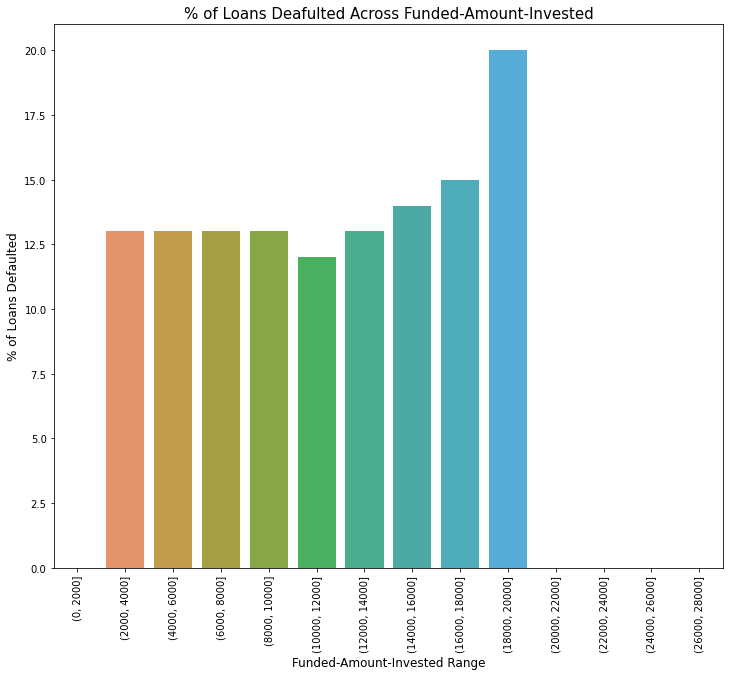

In [204]:

#funded_amnt_inv start
funded_amnt_inv =  alls[  alls["funded_amnt_inv"].notnull()]


funded_amnt_inv_bins = [x for x in range(0,30000,2000)]
funded_amnt_inv_defaulted = funded_amnt_inv[funded_amnt_inv["loan_status"]=="Charged Off"].groupby(by = [pd.cut(funded_amnt_inv[funded_amnt_inv["loan_status"]=="Charged Off"]['funded_amnt_inv'], funded_amnt_inv_bins)]).size().sort_values(ascending=False)
funded_amnt_inv_all =  funded_amnt_inv.groupby (by= [pd.cut(funded_amnt_inv['funded_amnt_inv'], funded_amnt_inv_bins)]).size().sort_values(ascending=False)

funded_amnt_inv_df = pd.concat([funded_amnt_inv_defaulted, funded_amnt_inv_all], axis=1)
funded_amnt_inv_df.columns = ["defaulted","all"]

funded_amnt_inv_th = 400

funded_amnt_inv_df = funded_amnt_inv_df[ funded_amnt_inv_df["all"] > funded_amnt_inv_th  ]

funded_amnt_inv_df["ratio"] = funded_amnt_inv_df[ ["defaulted","all"] ].apply(lambda x: (round((x[0]/x[1])*100,0)) , axis=1)
funded_amnt_inv_df["indexx"] = funded_amnt_inv_df.index

#funded_amnt_inv_th = 200

print(funded_amnt_inv_df)

#funded_amnt_inv_df[ funded_amnt_inv_df["all"] > funded_amnt_inv_th  ]["ratio"].sort_values(ascending=False).plot.bar()

#funded_amnt_inv_df = funded_amnt_inv_df[ funded_amnt_inv_df["all"] > funded_amnt_inv_th  ]

plt.figure(figsize=[12,10])
plt.xticks(rotation=90)
sns.barplot(data = funded_amnt_inv_df, x="indexx" , y="ratio" )
plt.title("% of Loans Deafulted Across Funded-Amount-Invested", fontsize=15)
plt.xlabel("Funded-Amount-Invested Range", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.show()

#funded_amnt_inv end

**Analysis of purpose variable**

                    defaulted    all  ratio
purpose                                    
debt_consolidation       1541  11287   14.0
credit_card               329   3259   10.0
other                     315   2181   14.0
small_business            232    921   25.0
home_improvement          198   1616   12.0
major_purchase            136   1244   11.0
car                       101    903   11.0
medical                    67    397   17.0
wedding                    53    612    9.0
moving                     44    302   15.0
house                      30    206   15.0


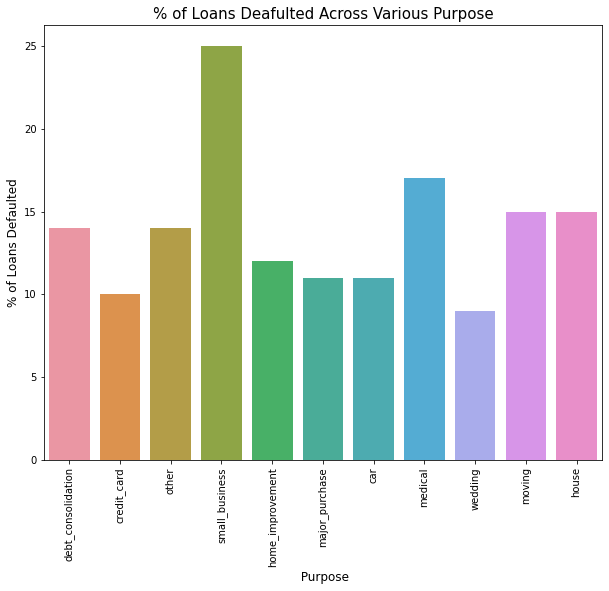

In [205]:
#purpose start

purpose =  alls[  alls["purpose"].notnull()]

purpose_defaulted = purpose[purpose["loan_status"]=="Charged Off"].groupby(by = ["purpose"] ).size().sort_values(ascending=False)
purpose_all =  purpose.groupby (by = ["purpose"]).size().sort_values(ascending=False)

purpose_df = pd.concat([purpose_defaulted, purpose_all], axis=1)
purpose_df.columns = ["defaulted","all"]


purpose_df["ratio"] = purpose_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

purpose_th = 200

purpose_df = purpose_df[ purpose_df["all"] > purpose_th ]


#purpose_df [purpose_df["all"] > purpose_th] ["ratio"].sort_values(ascending=False).plot.bar()

print(purpose_df)

plt.figure(figsize=[10,8])
plt.title("% of Loans Deafulted Across Various Purpose", fontsize=15)
sns.barplot(purpose_df["ratio"].index , purpose_df["ratio"].values)
plt.xlabel(" Purpose", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(purpose_df)
#purpose end



**Analysis of Month of issue variable**

             defaulted   all  ratio
issue_month                        
Dec                342  2366   14.0
Sep                335  2127   16.0
Nov                316  2281   14.0
Oct                299  2104   14.0
Jul                272  2106   13.0
Jun                262  1980   13.0
May                252  1786   14.0
Aug                248  2010   12.0
Apr                232  1855   13.0
Mar                206  1794   11.0
Jan                184  1407   13.0
Feb                168  1532   11.0


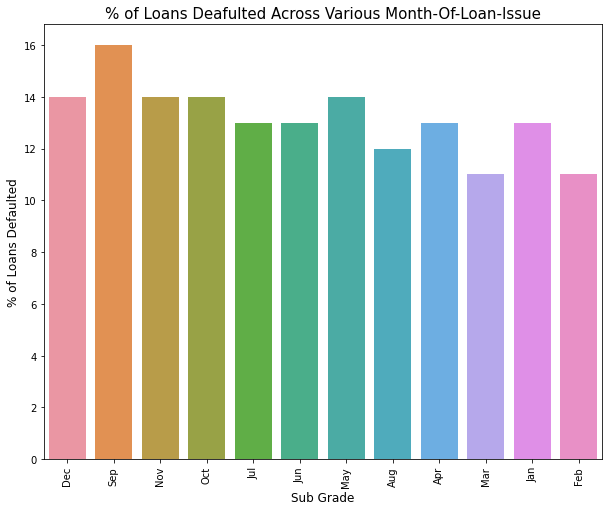

In [206]:
#issue_month start

issue_month =  alls[  alls["issue_month"].notnull()]

issue_month_defaulted = issue_month[issue_month["loan_status"]=="Charged Off"].groupby(by = ["issue_month"] ).size().sort_values(ascending=False)
issue_month_all =  issue_month.groupby (by = ["issue_month"]).size().sort_values(ascending=False)

issue_month_df = pd.concat([issue_month_defaulted, issue_month_all], axis=1)
issue_month_df.columns = ["defaulted","all"]


issue_month_df["ratio"] = issue_month_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)



issue_month_th = 150

issue_month_df = issue_month_df[ issue_month_df["all"] > issue_month_th ]

#issue_month_df [issue_month_df["all"] > issue_month_th] ["ratio"].sort_values(ascending=False).plot.bar()

print(issue_month_df)

plt.figure(figsize=[10,8])
plt.title("% of Loans Deafulted Across Various Month-Of-Loan-Issue", fontsize=15)
sns.barplot(issue_month_df["ratio"].index , issue_month_df["ratio"].values)
plt.xlabel("Sub Grade", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(issue_month_df)
#issue_month end

            defaulted    all  ratio
issue_year                         
2011             1666  11515   14.0
2010              974   7650   13.0
2009              406   3538   11.0
2008               69    627   11.0


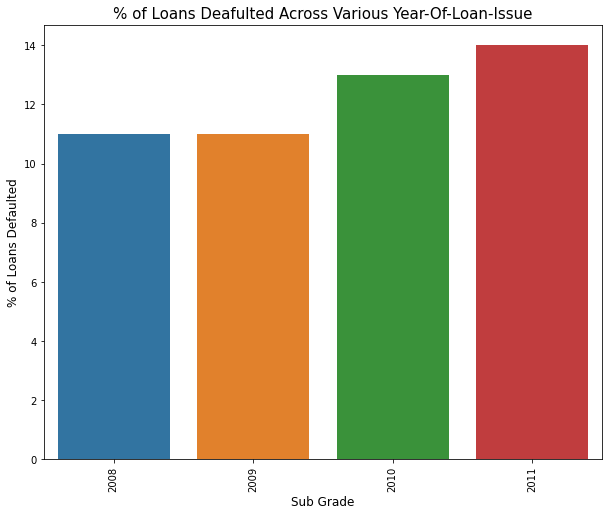

In [216]:
#issue_year start

issue_year =  alls[  alls["issue_year"].notnull()]

issue_year_defaulted = issue_year[issue_year["loan_status"]=="Charged Off"].groupby(by = ["issue_year"] ).size().sort_values(ascending=False)
issue_year_all =  issue_year.groupby (by = ["issue_year"]).size().sort_values(ascending=False)

issue_year_df = pd.concat([issue_year_defaulted, issue_year_all], axis=1)
issue_year_df.columns = ["defaulted","all"]


issue_year_df["ratio"] = issue_year_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)



issue_year_th = 150

issue_year_df = issue_year_df[ issue_year_df["all"] > issue_year_th ]

#issue_year_df [issue_year_df["all"] > issue_year_th] ["ratio"].sort_values(ascending=False).plot.bar()

print(issue_year_df)

plt.figure(figsize=[10,8])
plt.title("% of Loans Deafulted Across Various Year-Of-Loan-Issue", fontsize=15)
sns.barplot(issue_year_df["ratio"].index , issue_year_df["ratio"].values)
plt.xlabel("Sub Grade", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(issue_year_df)
#issue_year end

**Analysis of sub grade variable**

           defaulted   all  ratio
sub_grade                        
A3              49.0   827    6.0
A4             114.0  2077    5.0
A5             159.0  2015    8.0
B1             136.0  1407   10.0
B2             157.0  1492   11.0
B3             247.0  2088   12.0
B4             239.0  1836   13.0
B5             262.0  1909   14.0
C1             242.0  1539   16.0
C2             238.0  1414   17.0
C3             195.0  1125   17.0
C4             153.0   883   17.0
C5             149.0   820   18.0
D1             120.0   669   18.0
D2             208.0   959   22.0
D3             146.0   707   21.0
D4              78.0   411   19.0
D5              73.0   377   19.0
E1              81.0   348   23.0
E2              54.0   249   22.0


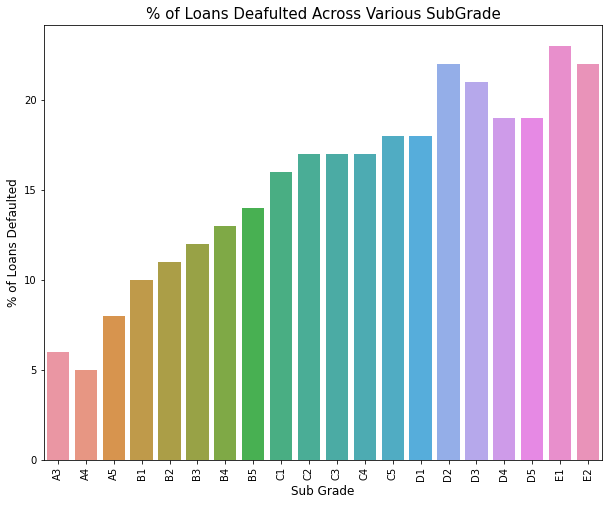

In [217]:
#sub_grade start

sub_grade =  alls[  alls["sub_grade"].notnull()]

sub_grade_defaulted = sub_grade[sub_grade["loan_status"]=="Charged Off"].groupby(by = ["sub_grade"] ).size().sort_values(ascending=False)
sub_grade_all =  sub_grade.groupby (by = ["sub_grade"]).size().sort_values(ascending=False)

sub_grade_df = pd.concat([sub_grade_defaulted, sub_grade_all], axis=1)
sub_grade_df.columns = ["defaulted","all"]


sub_grade_df["ratio"] = sub_grade_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)



sub_grade_th = 150

sub_grade_df = sub_grade_df[ sub_grade_df["all"] > sub_grade_th ]

#sub_grade_df [sub_grade_df["all"] > sub_grade_th] ["ratio"].sort_values(ascending=False).plot.bar()

sub_grade_df = sub_grade_df.sort_index()
print(sub_grade_df)

plt.figure(figsize=[10,8])
plt.title("% of Loans Deafulted Across Various SubGrade", fontsize=15)
sns.barplot(sub_grade_df["ratio"].index , sub_grade_df["ratio"].values)
plt.xlabel("Sub Grade", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(sub_grade_df)
#sub_grade end

**Analysis of term variable**

      defaulted    all  ratio
term                         
36         2039  18468   11.0
60         1077   4880   22.0


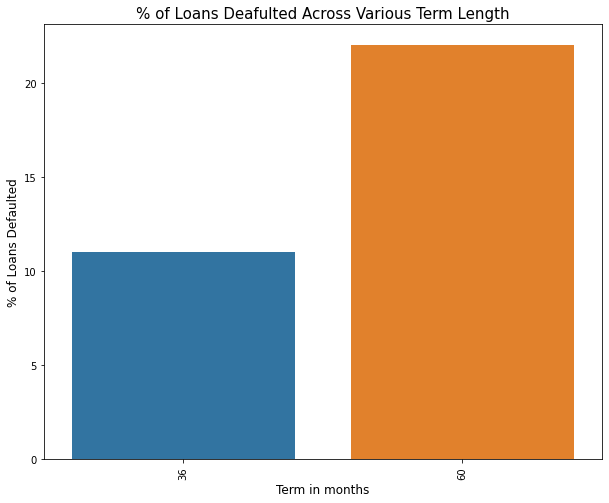

In [208]:

#term start

term =  alls[  alls["term"].notnull()]

term_defaulted = term[term["loan_status"]=="Charged Off"].groupby(by = ["term"] ).size().sort_values(ascending=False)
term_all =  term.groupby (by = ["term"]).size().sort_values(ascending=False)

term_df = pd.concat([term_defaulted, term_all], axis=1)
term_df.columns = ["defaulted","all"]


term_df["ratio"] = term_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)



term_th = 150

term_df = term_df[ term_df["all"] > term_th ]

#term_df [term_df["all"] > term_th] ["ratio"].sort_values(ascending=False).plot.bar()

print(term_df)

plt.figure(figsize=[10,8])
plt.title("% of Loans Deafulted Across Various Term Length", fontsize=15)
plt.xticks(rotation=90)
sns.barplot(term_df["ratio"].index , term_df["ratio"].values)
plt.xlabel("Term in months", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.show()
#print(term_df)
#term end

**Analysis of grade variable**

       defaulted   all  ratio
grade                        
A            325  5032    6.0
B           1041  8732   12.0
C            977  5781   17.0
D            625  3123   20.0
E            146   677   22.0


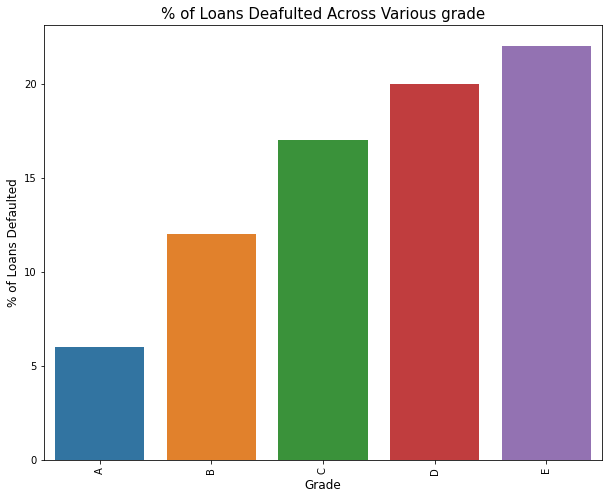

In [209]:

#grade start

grade =  alls[  alls["grade"].notnull()]

grade_defaulted = grade[grade["loan_status"]=="Charged Off"].groupby(by = ["grade"] ).size().sort_values(ascending=False)
grade_all =  grade.groupby (by = ["grade"]).size().sort_values(ascending=False)

grade_df = pd.concat([grade_defaulted, grade_all], axis=1)
grade_df.columns = ["defaulted","all"]


grade_df["ratio"] = grade_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)



grade_th = 300

grade_df = grade_df[ grade_df["all"] > grade_th ]

#grade_df [grade_df["all"] > grade_th] ["ratio"].sort_values(ascending=False).plot.bar()

grade_df = grade_df.sort_index()
print(grade_df)

plt.figure(figsize=[10,8])
sns.barplot(grade_df["ratio"].index , grade_df["ratio"].values)
plt.title("% of Loans Deafulted Across Various grade", fontsize=15)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(grade_df)
#grade end

**Analysis of home ownership variable**

                defaulted    all  ratio
home_ownership                         
RENT                 1605  11762   14.0
MORTGAGE             1257   9743   13.0
OWN                   241   1773   14.0


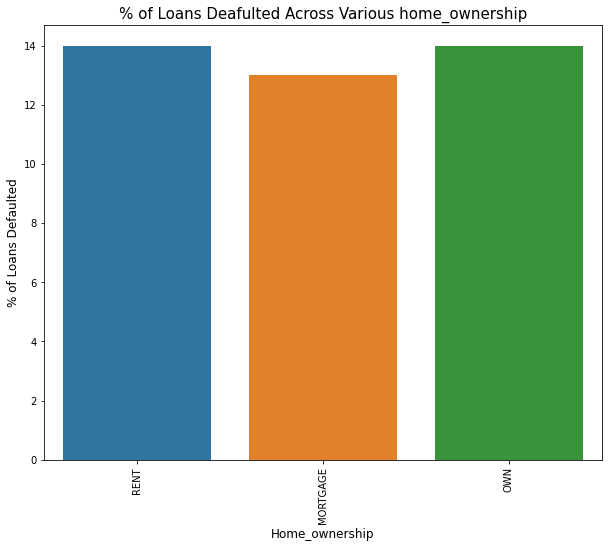

In [210]:
#home_ownership start

home_ownership =  alls[  alls["home_ownership"].notnull()]

home_ownership_defaulted = home_ownership[home_ownership["loan_status"]=="Charged Off"].groupby(by = ["home_ownership"] ).size().sort_values(ascending=False)
home_ownership_all =  home_ownership.groupby (by = ["home_ownership"]).size().sort_values(ascending=False)

home_ownership_df = pd.concat([home_ownership_defaulted, home_ownership_all], axis=1)
home_ownership_df.columns = ["defaulted","all"]


home_ownership_df["ratio"] = home_ownership_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

home_ownership_th = 200

home_ownership_df = home_ownership_df[ home_ownership_df["all"] > home_ownership_th ]

#home_ownership_df [home_ownership_df["all"] > home_ownership_th] ["ratio"].sort_values(ascending=False).plot.bar()

print(home_ownership_df)

plt.figure(figsize=[10,8])
sns.barplot(home_ownership_df["ratio"].index , home_ownership_df["ratio"].values)
plt.title("% of Loans Deafulted Across Various home_ownership" , fontsize=15 )
plt.xlabel("Home_ownership" , fontsize=12)
plt.ylabel("% of Loans Defaulted" , fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(home_ownership_df)
#home_ownership end

**Analysis of employment length variable**

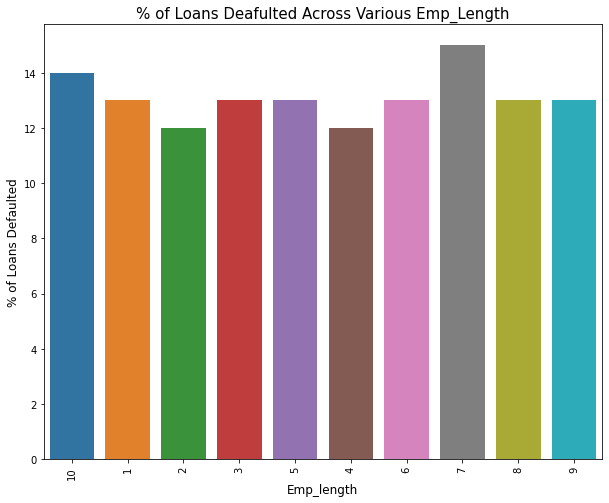

In [211]:
#emp_length start

emp_length =  alls[  alls["emp_length"].notnull()]

emp_length_defaulted = emp_length[emp_length["loan_status"]=="Charged Off"].groupby(by = ["emp_length"] ).size().sort_values(ascending=False)
emp_length_all =  emp_length.groupby (by = ["emp_length"]).size().sort_values(ascending=False)

emp_length_df = pd.concat([emp_length_defaulted, emp_length_all], axis=1)
emp_length_df.columns = ["defaulted","all"]


emp_length_df["ratio"] = emp_length_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

emp_length_th = 200

emp_length_df = emp_length_df[ emp_length_df["all"] > emp_length_th ]


#emp_length_df [emp_length_df["all"] > emp_length_th] ["ratio"].sort_values(ascending=False).plot.bar()

#print(emp_length_df)

plt.figure(figsize=[10,8])
sns.barplot(emp_length_df["ratio"].index , emp_length_df["ratio"].values)
plt.title("% of Loans Deafulted Across Various Emp_Length", fontsize=15)
plt.xlabel("Emp_length" , fontsize=12)
plt.ylabel("% of Loans Defaulted" , fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(emp_length_df)
#emp_length end

**Analysis of state variable**

            defaulted   all  ratio
addr_state                        
CA              647.0  4254   15.0
NY              272.0  2275   12.0
FL              270.0  1696   16.0
TX              152.0  1589   10.0
NJ              151.0  1114   14.0
GA              131.0   794   16.0
IL              111.0   917   12.0
PA               96.0   903   11.0
MA               95.0   781   12.0
VA               89.0   833   11.0
MD               85.0   612   14.0
OH               82.0   723   11.0
MO               74.0   422   18.0
AZ               72.0   523   14.0
WA               70.0   499   14.0
NV               58.0   280   21.0
MI               56.0   409   14.0
MN               56.0   365   15.0
CT               55.0   438   13.0
CO               52.0   447   12.0
NC               52.0   395   13.0
SC               36.0   274   13.0
OR               36.0   265   14.0
WI               35.0   267   13.0
LA               34.0   250   14.0
AL               29.0   272   11.0


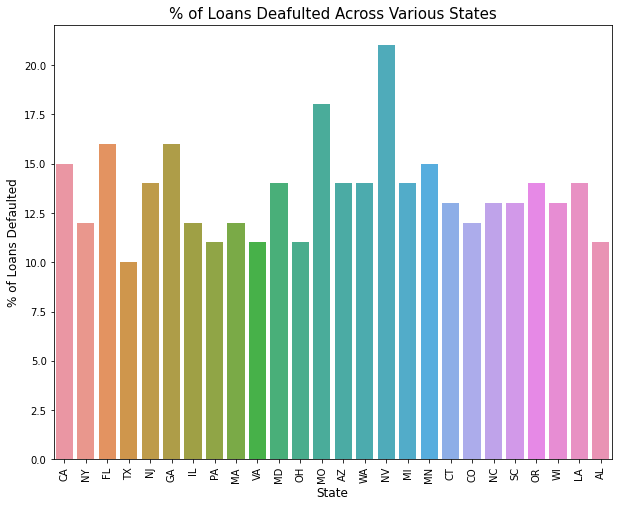

In [212]:
#addr_state start

addr_state =  alls[  alls["addr_state"].notnull()]

addr_state_defaulted = addr_state[addr_state["loan_status"]=="Charged Off"].groupby(by = ["addr_state"] ).size().sort_values(ascending=False)
addr_state_all =  addr_state.groupby (by = ["addr_state"]).size().sort_values(ascending=False)

addr_state_df = pd.concat([addr_state_defaulted, addr_state_all], axis=1)
addr_state_df.columns = ["defaulted","all"]


addr_state_df["ratio"] = addr_state_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

addr_state_th = 200

addr_state_df = addr_state_df[ addr_state_df["all"] > addr_state_th ]


#addr_state_df [addr_state_df["all"] > addr_state_th] ["ratio"].sort_values(ascending=False).plot.bar()

print(addr_state_df)

plt.figure(figsize=[10,8])
sns.barplot(addr_state_df["ratio"].index , addr_state_df["ratio"].values)
plt.title("% of Loans Deafulted Across Various States", fontsize=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()
#print(addr_state_df)
#addr_state end

**Analysis of revolving balance variable**

                defaulted   all  ratio          indexx
revol_bal                                             
(0, 2000]             342  2687   13.0       (0, 2000]
(2000, 4000]          374  2694   14.0    (2000, 4000]
(4000, 6000]          359  2642   14.0    (4000, 6000]
(6000, 8000]          318  2417   13.0    (6000, 8000]
(8000, 10000]         281  2171   13.0   (8000, 10000]
(10000, 12000]        234  1800   13.0  (10000, 12000]
(12000, 14000]        209  1534   14.0  (12000, 14000]
(14000, 16000]        154  1250   12.0  (14000, 16000]
(16000, 18000]        140  1030   14.0  (16000, 18000]
(18000, 20000]        103   787   13.0  (18000, 20000]
(20000, 22000]         84   555   15.0  (20000, 22000]
(22000, 24000]         63   503   13.0  (22000, 24000]
(24000, 26000]         55   407   14.0  (24000, 26000]
(26000, 28000]         39   295   13.0  (26000, 28000]


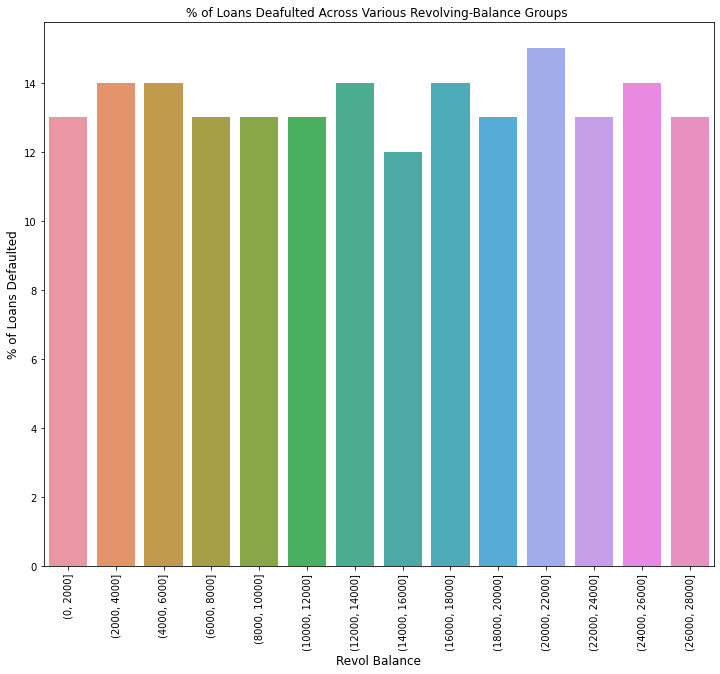

In [213]:
#revol_bal start
revol_bal =  alls[  alls["revol_bal"].notnull()]


revol_bal_bins = [x for x in range(0,30000,2000)]
revol_bal_defaulted = revol_bal[revol_bal["loan_status"]=="Charged Off"].groupby(by = [pd.cut(revol_bal[revol_bal["loan_status"]=="Charged Off"]['revol_bal'], revol_bal_bins)]).size().sort_values(ascending=False)
revol_bal_all =  revol_bal.groupby (by= [pd.cut(revol_bal['revol_bal'], revol_bal_bins)]).size().sort_values(ascending=False)

revol_bal_df = pd.concat([revol_bal_defaulted, revol_bal_all], axis=1)
revol_bal_df.columns = ["defaulted","all"]


revol_bal_df["ratio"] = revol_bal_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)
revol_bal_df["indexx"] = revol_bal_df.index

revol_bal_th = 150

print(revol_bal_df)

#revol_bal_df[ revol_bal_df["all"] > revol_bal_th  ]["ratio"].sort_values(ascending=False).plot.bar()

revol_bal_df = revol_bal_df[ revol_bal_df["all"] > revol_bal_th  ]

plt.figure(figsize=[12,10])
plt.xticks(rotation=90)
sns.barplot(data = revol_bal_df, x="indexx" , y="ratio" )
plt.title("% of Loans Deafulted Across Various Revolving-Balance Groups ")
plt.xlabel("Revol Balance",fontsize=12)
plt.ylabel("% of Loans Defaulted",fontsize=12)
plt.show()

#revol_bal end

**Analysis of total account variable**

           defaulted   all  ratio    indexx
total_acc                                  
(0, 4]            47   310   15.0    (0, 4]
(4, 8]           271  1881   14.0    (4, 8]
(8, 12]          448  3116   14.0   (8, 12]
(12, 16]         495  3629   14.0  (12, 16]
(16, 20]         420  3465   12.0  (16, 20]
(20, 24]         405  3034   13.0  (20, 24]
(24, 28]         316  2477   13.0  (24, 28]
(28, 32]         223  1844   12.0  (28, 32]
(32, 36]         192  1260   15.0  (32, 36]
(36, 40]         133   910   15.0  (36, 40]
(40, 44]          74   533   14.0  (40, 44]
(44, 48]          47   366   13.0  (44, 48]
(48, 52]          18   228    8.0  (48, 52]
(52, 56]          12   125   10.0  (52, 56]
(56, 60]           6    61   10.0  (56, 60]
(60, 64]           9    97    9.0  (60, 64]
(64, 68]           0     5    0.0  (64, 68]
(68, 72]           0     3    0.0  (68, 72]
(72, 76]           0     1    0.0  (72, 76]


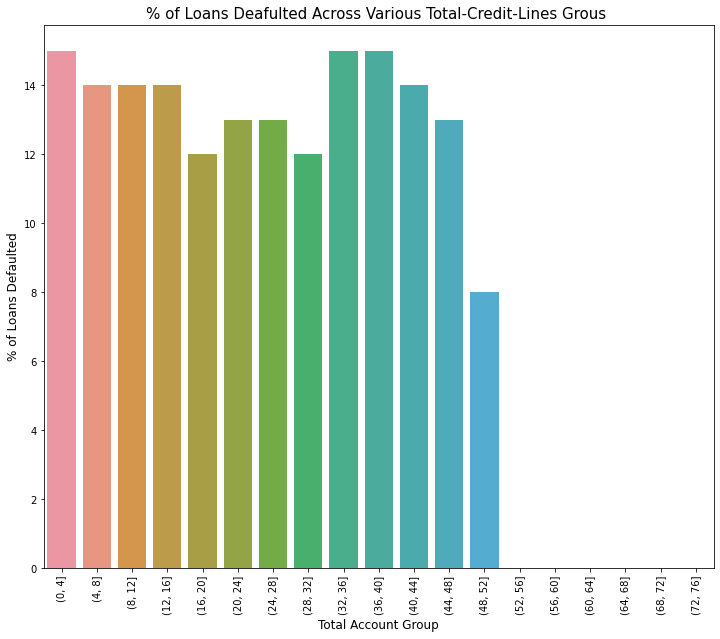

In [214]:
#total_acc start
total_acc =  alls[  alls["total_acc"].notnull()]


total_acc_bins = [x for x in range(0,78,4)]
total_acc_defaulted = total_acc[total_acc["loan_status"]=="Charged Off"].groupby(by = [pd.cut(total_acc[total_acc["loan_status"]=="Charged Off"]['total_acc'], total_acc_bins)]).size().sort_values(ascending=False)
total_acc_all =  total_acc.groupby (by= [pd.cut(total_acc['total_acc'], total_acc_bins)]).size().sort_values(ascending=False)

total_acc_df = pd.concat([total_acc_defaulted, total_acc_all], axis=1)
total_acc_df.columns = ["defaulted","all"]


total_acc_df["ratio"] = total_acc_df[ ["defaulted","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)
total_acc_df["indexx"] = total_acc_df.index

total_acc_th = 150

print(total_acc_df)

#total_acc_df[ total_acc_df["all"] > total_acc_th  ]["ratio"].sort_values(ascending=False).plot.bar()

total_acc_df = total_acc_df[ total_acc_df["all"] > total_acc_th  ]

plt.figure(figsize=[12,10])
plt.xticks(rotation=90)
sns.barplot(data = total_acc_df, x="indexx" , y="ratio" )
plt.title("% of Loans Deafulted Across Various Total-Credit-Lines Grous ", fontsize=15)
plt.xlabel("Total Account Group", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.show()

#total_acc end

# Bivariate analysis with different variables

**Analysis of term and purpose variables together**

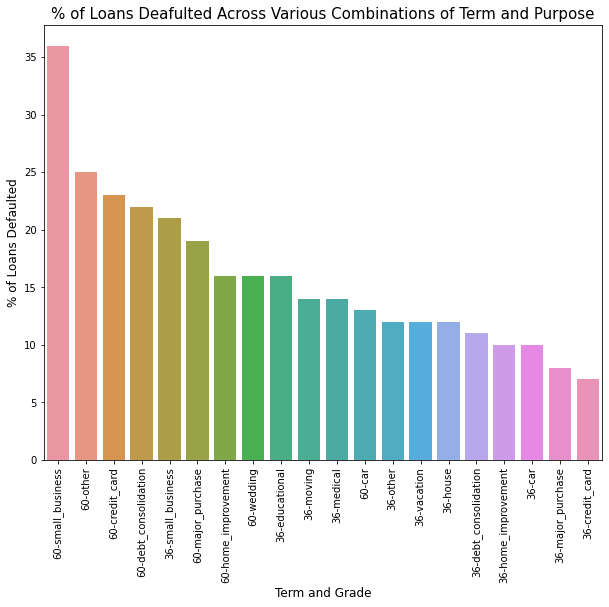

In [226]:
# Bivariate term_purpose start
term_purpose = alls[alls["loan_status"]=="Charged Off" ];
#term_purpose[term_purpose["loan_status"]=="Charged Off"].groupby(by = ['term']).size().plot.bar( rot=90)

term_purpose_co_group = term_purpose[term_purpose["loan_status"]=="Charged Off"].groupby(by = ['term', 'purpose']).size().sort_values(ascending=False)
term_purpose_all_group = alls.groupby(by = ['term','purpose']).size().sort_values(ascending=False)

term_purpose_grp = pd.concat([term_purpose_co_group, term_purpose_all_group], axis=1)

#print (type(term_purpose_grp))
term_purpose_grp.columns = ['co','all']
#term_purpose_grp[['co','all']].plot.bar( rot=90)

term_purpose_grp = term_purpose_grp[term_purpose_grp['all']>100];

term_purpose_grp["co_percent"] = term_purpose_grp.co.apply(lambda x: round(x*100/term_purpose_grp.co.sum(),2))
term_purpose_grp["all_percent"]= term_purpose_grp['all'].apply(lambda x: round(x*100/term_purpose_grp['all'].sum(),2))
term_purpose_grp["ratio"] = term_purpose_grp[ ["co","all"] ].apply(lambda x: int(x[0]*100//x[1]) , axis=1)

#term_purpose_grp["indexx"] = 
term_purpose_grp = term_purpose_grp[['ratio']].sort_values(by='ratio',ascending=False).head(20)
#term_purpose_grp[] = term_purpose_grp.index.map('_'.join)

term_purpose_grp = term_purpose_grp.reset_index(level=[0,1])


term_purpose_grp["indexx"] = term_purpose_grp[ ["term","purpose"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)



plt.figure(figsize=[10,8])
sns.barplot(term_purpose_grp["indexx"] , term_purpose_grp["ratio"].values)
plt.title("% of Loans Deafulted Across Various Combinations of Term and Purpose", fontsize=15)
plt.xlabel("Term and Grade" , fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()



#term_purpose_grp.sort_values(by='ratio',ascending=False).head(100)

#term_purpose end

**Analysis of subgrade and home ownership variables together**

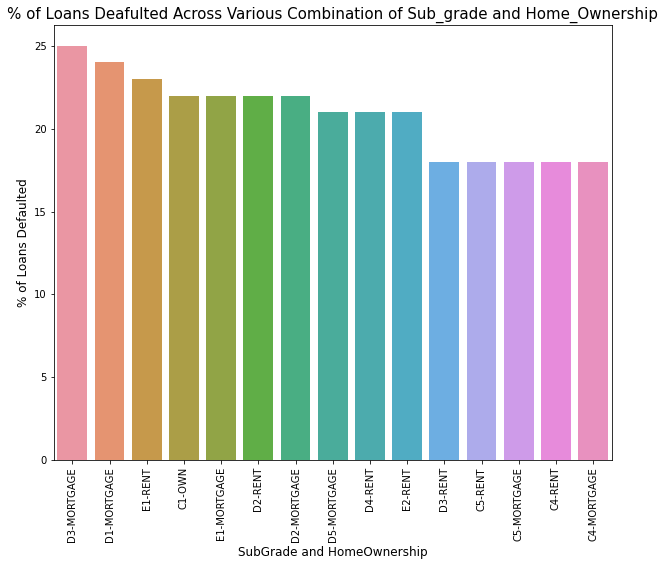

In [227]:
# Bivariate sub_grade_home_ownership start
sub_grade_home_ownership = alls[alls["loan_status"]=="Charged Off" ];
#sub_grade_home_ownership[sub_grade_home_ownership["loan_status"]=="Charged Off"].groupby(by = ['sub_grade']).size().plot.bar( rot=90)

sub_grade_home_ownership_co_group = sub_grade_home_ownership[sub_grade_home_ownership["loan_status"]=="Charged Off"].groupby(by = ['sub_grade', 'home_ownership']).size().sort_values(ascending=False)
sub_grade_home_ownership_all_group = alls.groupby(by = ['sub_grade','home_ownership']).size().sort_values(ascending=False)

sub_grade_home_ownership_grp = pd.concat([sub_grade_home_ownership_co_group, sub_grade_home_ownership_all_group], axis=1)

#print (type(sub_grade_home_ownership_grp))
sub_grade_home_ownership_grp.columns = ['co','all']
#sub_grade_home_ownership_grp[['co','all']].plot.bar( rot=90)



sub_grade_home_ownership_grp["co_percent"] = sub_grade_home_ownership_grp.co.apply(lambda x: round(x*100/sub_grade_home_ownership_grp.co.sum(),2))
sub_grade_home_ownership_grp["all_percent"]= sub_grade_home_ownership_grp['all'].apply(lambda x: round(x*100/sub_grade_home_ownership_grp['all'].sum(),2))
sub_grade_home_ownership_grp["ratio"] = sub_grade_home_ownership_grp[ ["co","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

sub_grade_home_ownership_grp = sub_grade_home_ownership_grp[sub_grade_home_ownership_grp['all']>100];


sub_grade_home_ownership_grp = sub_grade_home_ownership_grp.reset_index(level=[0,1])


sub_grade_home_ownership_grp["indexx"] = sub_grade_home_ownership_grp[ ["sub_grade","home_ownership"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)

sub_grade_home_ownership_grp = sub_grade_home_ownership_grp[['ratio','indexx']].sort_values(by='ratio',ascending=False).head(15)


plt.figure(figsize=[10,8])
sns.barplot(sub_grade_home_ownership_grp["indexx"] , sub_grade_home_ownership_grp["ratio"].values)
plt.title("% of Loans Deafulted Across Various Combination of Sub_grade and Home_Ownership", fontsize=15)
plt.xlabel("SubGrade and HomeOwnership", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()

#sub_grade_home_ownership_grp[['ratio']].sort_values(by='ratio',ascending=False).head(10).plot.bar(rot=90)

#sub_grade_home_ownership_grp.sort_values(by='ratio',ascending=False).head(10)

#sub_grade_home_ownership end

**Analysis of sub grade and annual income variables together**

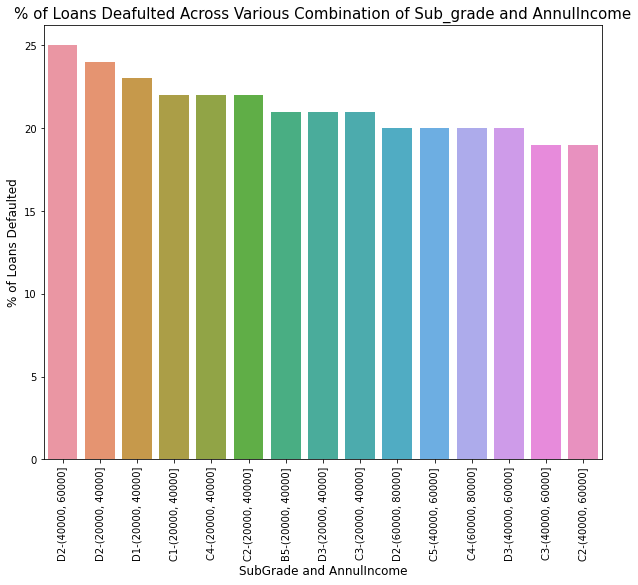

In [228]:
# Bivariate sub_grade_annual_inc start (annual_income)
sub_grade_annual_inc = alls[alls["loan_status"]=="Charged Off" ];

annual_inc_bin = [x for x in range (0, 200000, 20000)]
sub_grade_annual_inc['annual_inc_bin'] = pd.cut(sub_grade_annual_inc['annual_inc'], annual_inc_bin)
alls['annual_inc_bin'] = pd.cut(alls['annual_inc'], annual_inc_bin)


sub_grade_annual_inc_co_group = sub_grade_annual_inc[sub_grade_annual_inc["loan_status"]=="Charged Off"].groupby(by = ['sub_grade', 'annual_inc_bin']).size().sort_values(ascending=False)
sub_grade_annual_inc_all_group = alls.groupby(by = ['sub_grade','annual_inc_bin']).size().sort_values(ascending=False)

sub_grade_annual_inc_grp = pd.concat([sub_grade_annual_inc_co_group, sub_grade_annual_inc_all_group], axis=1)

#print (type(sub_grade_annual_inc_grp))
sub_grade_annual_inc_grp.columns = ['co','all']


sub_grade_annual_inc_grp["co_percent"] = sub_grade_annual_inc_grp.co.apply(lambda x: round(x*100/sub_grade_annual_inc_grp.co.sum(),2))
sub_grade_annual_inc_grp["all_percent"]= sub_grade_annual_inc_grp['all'].apply(lambda x: round(x*100/sub_grade_annual_inc_grp['all'].sum(),2))
sub_grade_annual_inc_grp["ratio"] = sub_grade_annual_inc_grp[ ["co","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

sub_grade_annual_inc_grp = sub_grade_annual_inc_grp[sub_grade_annual_inc_grp['all']>150];

sub_grade_annual_inc_grp = sub_grade_annual_inc_grp.reset_index(level=[0,1])


sub_grade_annual_inc_grp["indexx"] = sub_grade_annual_inc_grp[ ["sub_grade","annual_inc_bin"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)

sub_grade_annual_inc_grp = sub_grade_annual_inc_grp[['ratio','indexx']].sort_values(by='ratio',ascending=False).head(15)


plt.figure(figsize=[10,8])
sns.barplot(sub_grade_annual_inc_grp["indexx"] , sub_grade_annual_inc_grp["ratio"].values)
plt.title("% of Loans Deafulted Across Various Combination of Sub_grade and AnnulIncome", fontsize=15)
plt.xlabel("SubGrade and AnnulIncome", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()



#sub_grade_annual_inc_grp.sort_values(by='ratio',ascending=False).head(10)

#sub_grade_annual_income end

**Analysis of state and annual icome variables together**

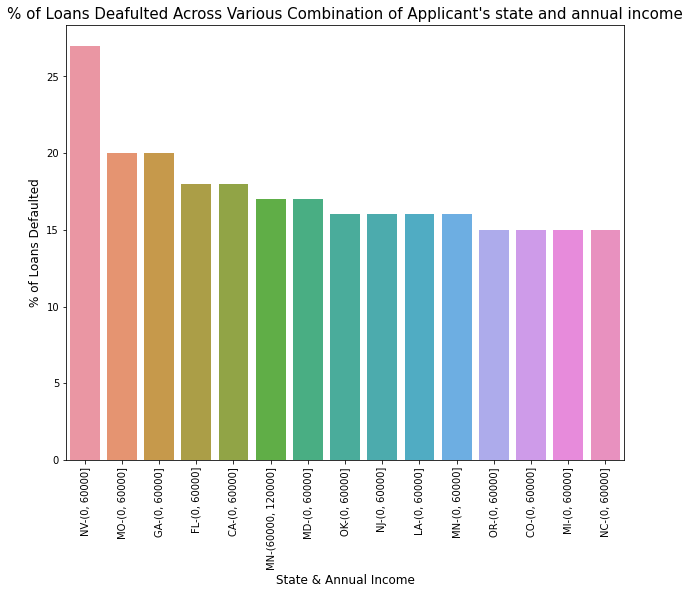

In [229]:
######################################################

# Bivariate addr_state_annual_inc start (annual_income)
addr_state_annual_inc = alls[alls["loan_status"]=="Charged Off" ];

annual_inc_bin = [x for x in range (0, 240000, 60000)]
addr_state_annual_inc['annual_inc_bin'] = pd.cut(addr_state_annual_inc['annual_inc'], annual_inc_bin)
alls['annual_inc_bin'] = pd.cut(alls['annual_inc'], annual_inc_bin)


addr_state_annual_inc_co_group = addr_state_annual_inc[addr_state_annual_inc["loan_status"]=="Charged Off"].groupby(by = ['addr_state', 'annual_inc_bin']).size().sort_values(ascending=False)
addr_state_annual_inc_all_group = alls.groupby(by = ['addr_state','annual_inc_bin']).size().sort_values(ascending=False)

addr_state_annual_inc_grp = pd.concat([addr_state_annual_inc_co_group, addr_state_annual_inc_all_group], axis=1)

#print (type(addr_state_annual_inc_grp))
addr_state_annual_inc_grp.columns = ['co','all']


addr_state_annual_inc_grp["co_percent"] = addr_state_annual_inc_grp.co.apply(lambda x: round(x*100/addr_state_annual_inc_grp.co.sum(),2))
addr_state_annual_inc_grp["all_percent"]= addr_state_annual_inc_grp['all'].apply(lambda x: round(x*100/addr_state_annual_inc_grp['all'].sum(),2))
addr_state_annual_inc_grp["ratio"] = addr_state_annual_inc_grp[ ["co","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

addr_state_annual_inc_grp = addr_state_annual_inc_grp[addr_state_annual_inc_grp['all']>100];

addr_state_annual_inc_grp = addr_state_annual_inc_grp.reset_index(level=[0,1])


addr_state_annual_inc_grp["indexx"] = addr_state_annual_inc_grp[ ["addr_state","annual_inc_bin"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)

addr_state_annual_inc_grp = addr_state_annual_inc_grp[['ratio','indexx']].sort_values(by='ratio',ascending=False).head(15)


plt.figure(figsize=[10,8])
sns.barplot(addr_state_annual_inc_grp["indexx"] , addr_state_annual_inc_grp["ratio"].values)
plt.title("% of Loans Deafulted Across Various Combination of Applicant's state and annual income", fontsize=15)
plt.xlabel("State & Annual Income" , fontsize=12)
plt.ylabel("% of Loans Defaulted" , fontsize=12)
plt.xticks(rotation=90)
plt.show()



#addr_state_annual_inc_grp.sort_values(by='ratio',ascending=False).head(10)

#addr_state_annual_income end



**Analysis of term and annaul income together**

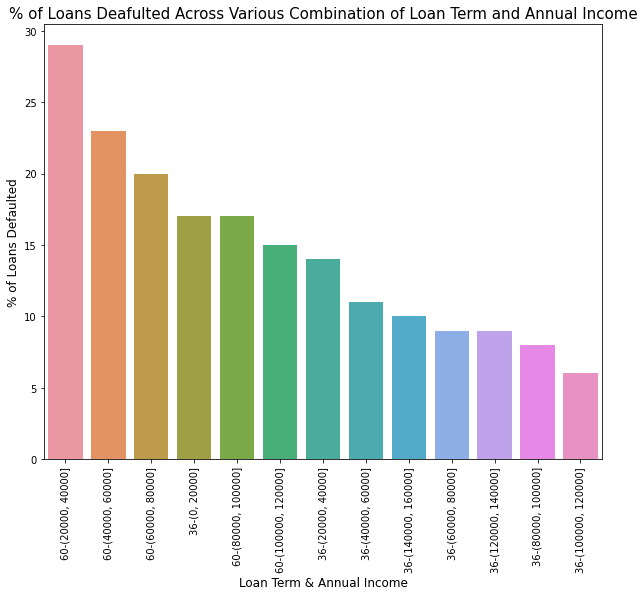

In [230]:
#######################################

# Bivariate term_annual_inc start (annual_income)
term_annual_inc = alls[alls["loan_status"]=="Charged Off" ];

annual_inc_bin = [x for x in range (0, 200000, 20000)]
term_annual_inc['annual_inc_bin'] = pd.cut(term_annual_inc['annual_inc'], annual_inc_bin)
alls['annual_inc_bin'] = pd.cut(alls['annual_inc'], annual_inc_bin)


term_annual_inc_co_group = term_annual_inc[term_annual_inc["loan_status"]=="Charged Off"].groupby(by = ['term', 'annual_inc_bin']).size().sort_values(ascending=False)
term_annual_inc_all_group = alls.groupby(by = ['term','annual_inc_bin']).size().sort_values(ascending=False)

term_annual_inc_grp = pd.concat([term_annual_inc_co_group, term_annual_inc_all_group], axis=1)

#print (type(term_annual_inc_grp))
term_annual_inc_grp.columns = ['co','all']


term_annual_inc_grp["co_percent"] = term_annual_inc_grp.co.apply(lambda x: round(x*100/term_annual_inc_grp.co.sum(),2))
term_annual_inc_grp["all_percent"]= term_annual_inc_grp['all'].apply(lambda x: round(x*100/term_annual_inc_grp['all'].sum(),2))
term_annual_inc_grp["ratio"] = term_annual_inc_grp[ ["co","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

term_annual_inc_grp = term_annual_inc_grp[term_annual_inc_grp['all']>150];

term_annual_inc_grp = term_annual_inc_grp.reset_index(level=[0,1])


term_annual_inc_grp["indexx"] = term_annual_inc_grp[ ["term","annual_inc_bin"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)

term_annual_inc_grp = term_annual_inc_grp[['ratio','indexx']].sort_values(by='ratio',ascending=False).head(15)


plt.figure(figsize=[10,8])
sns.barplot(term_annual_inc_grp["indexx"] , term_annual_inc_grp["ratio"].values)
plt.title("% of Loans Deafulted Across Various Combination of Loan Term and Annual Income", fontsize=15)
plt.xlabel("Loan Term & Annual Income", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)
plt.show()



#term_annual_inc_grp.sort_values(by='ratio',ascending=False).head(10)

#term_annual_income end



**Analysis of purposre and pannual income variables together**

<class 'pandas.core.frame.DataFrame'>


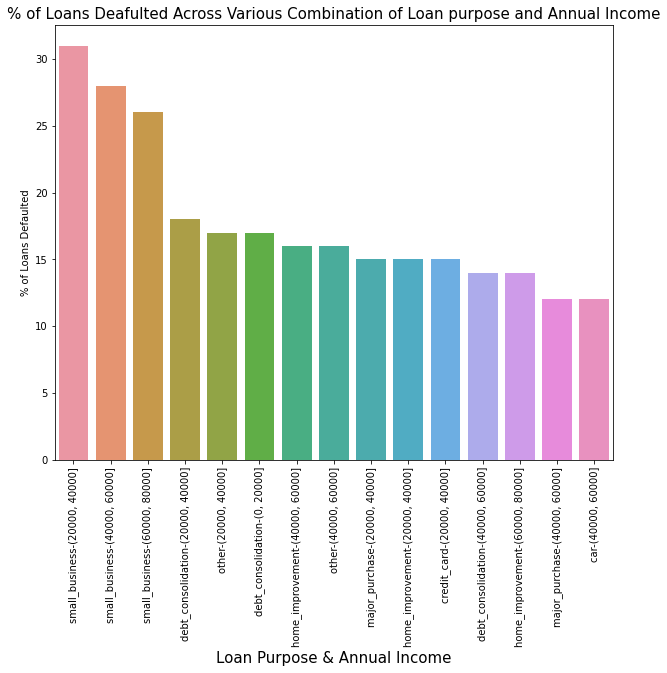

In [231]:
#######################################

# Bivariate purpose_annual_inc start (annual_income)
purpose_annual_inc = alls[alls["loan_status"]=="Charged Off" ];

annual_inc_bin = [x for x in range (0, 200000, 20000)]
purpose_annual_inc['annual_inc_bin'] = pd.cut(purpose_annual_inc['annual_inc'], annual_inc_bin)
alls['annual_inc_bin'] = pd.cut(alls['annual_inc'], annual_inc_bin)


purpose_annual_inc_co_group = purpose_annual_inc[purpose_annual_inc["loan_status"]=="Charged Off"].groupby(by = ['purpose', 'annual_inc_bin']).size().sort_values(ascending=False)
purpose_annual_inc_all_group = alls.groupby(by = ['purpose','annual_inc_bin']).size().sort_values(ascending=False)

purpose_annual_inc_grp = pd.concat([purpose_annual_inc_co_group, purpose_annual_inc_all_group], axis=1)

print (type(purpose_annual_inc_grp))
purpose_annual_inc_grp.columns = ['co','all']


purpose_annual_inc_grp["co_percent"] = purpose_annual_inc_grp.co.apply(lambda x: round(x*100/purpose_annual_inc_grp.co.sum(),2))
purpose_annual_inc_grp["all_percent"]= purpose_annual_inc_grp['all'].apply(lambda x: round(x*100/purpose_annual_inc_grp['all'].sum(),2))
purpose_annual_inc_grp["ratio"] = purpose_annual_inc_grp[ ["co","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

purpose_annual_inc_grp = purpose_annual_inc_grp[purpose_annual_inc_grp['all']>150];

purpose_annual_inc_grp = purpose_annual_inc_grp.reset_index(level=[0,1])


purpose_annual_inc_grp["indexx"] = purpose_annual_inc_grp[ ["purpose","annual_inc_bin"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)

purpose_annual_inc_grp = purpose_annual_inc_grp[['ratio','indexx']].sort_values(by='ratio',ascending=False).head(15)


plt.figure(figsize=[10,8])
sns.barplot(purpose_annual_inc_grp["indexx"] , purpose_annual_inc_grp["ratio"].values)
plt.title("% of Loans Deafulted Across Various Combination of Loan purpose and Annual Income", fontsize=15)
plt.xlabel("Loan Purpose & Annual Income" , fontsize=15)
plt.ylabel("% of Loans Defaulted")
plt.xticks(rotation=90)
plt.show()



#purpose_annual_inc_grp.sort_values(by='ratio',ascending=False).head(10)

#purpose_annual_income end

######################################################


**Analysis of grade and interest rate variables together**

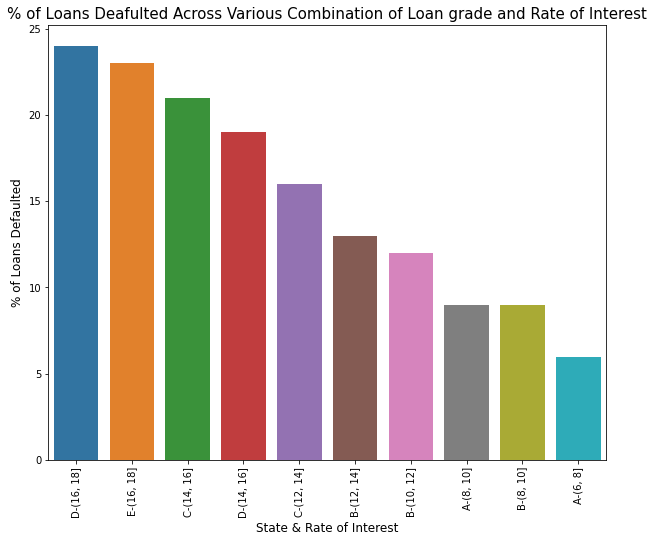

In [232]:
# Bivariate grade_int_rate start (int_rateome)

grade_int_rate = alls[alls["loan_status"]=="Charged Off" ];

#grade_int_rate['int_rate'] = grade_int_rate['int_rate'].str.strip('%')
#alls['int_rate'] = alls['int_rate'].str.strip('%')

grade_int_rate['int_rate'] = pd.to_numeric(grade_int_rate['int_rate'], downcast="float")
alls['int_rate'] = pd.to_numeric(alls['int_rate'], downcast="float")


#grade_int_rate['int_rate'] =grade_int_rate['int_rate'].str.strip('< > % ')
int_rate_bin = [x for x in range (0, 25, 2)]
grade_int_rate['int_rate_bin'] = pd.cut(grade_int_rate['int_rate'], int_rate_bin)
alls['int_rate_bin'] = pd.cut(alls['int_rate'], int_rate_bin)


grade_int_rate_co_group = grade_int_rate[grade_int_rate["loan_status"]=="Charged Off"].groupby(by = ['grade', 'int_rate_bin']).size().sort_values(ascending=False)
grade_int_rate_all_group = alls.groupby(by = ['grade','int_rate_bin']).size().sort_values(ascending=False)

grade_int_rate_grp = pd.concat([grade_int_rate_co_group, grade_int_rate_all_group], axis=1)

#print (type(grade_int_rate_grp))
grade_int_rate_grp.columns = ['co','all']


grade_int_rate_grp["co_percent"] = grade_int_rate_grp.co.apply(lambda x: round(x*100/grade_int_rate_grp.co.sum(),2))
grade_int_rate_grp["all_percent"]= grade_int_rate_grp['all'].apply(lambda x: round(x*100/grade_int_rate_grp['all'].sum(),2))
grade_int_rate_grp["ratio"] = grade_int_rate_grp[ ["co","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

grade_int_rate_grp = grade_int_rate_grp[grade_int_rate_grp['all']>150];

grade_int_rate_grp = grade_int_rate_grp.reset_index(level=[0,1])


grade_int_rate_grp["indexx"] = grade_int_rate_grp[ ["grade","int_rate_bin"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)

grade_int_rate_grp = grade_int_rate_grp[['ratio','indexx']].sort_values(by='ratio',ascending=False).head(15)


plt.figure(figsize=[10,8])


sns.barplot(grade_int_rate_grp["indexx"] , grade_int_rate_grp["ratio"].values)

plt.title("% of Loans Deafulted Across Various Combination of Loan grade and Rate of Interest", fontsize=15)
plt.xlabel("State & Rate of Interest", fontsize=12)
plt.ylabel("% of Loans Defaulted", fontsize=12)
plt.xticks(rotation=90)

plt.show()




#grade_int_rate_grp.sort_values(by='ratio',ascending=False).head(10)

#grade_int_rateome end



**Analysis of purpose and total account variables together**

<class 'pandas.core.frame.DataFrame'>


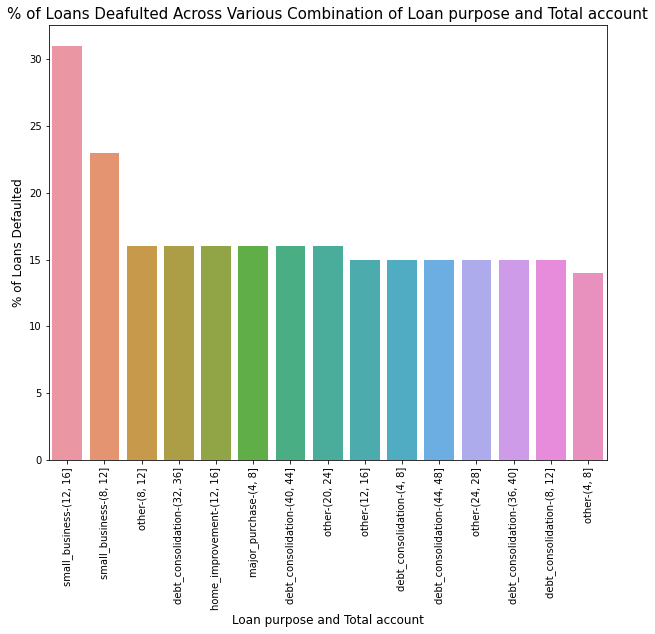

In [233]:
########################################

# Bivariate purpose_total_acc start (total_accome)

purpose_total_acc = alls[alls["loan_status"]=="Charged Off" ];

#purpose_total_acc['total_acc'] = purpose_total_acc['total_acc'].str.strip('%')
#alls['total_acc'] = alls['total_acc'].str.strip('%')

purpose_total_acc['total_acc'] = pd.to_numeric(purpose_total_acc['total_acc'], downcast="float")
alls['total_acc'] = pd.to_numeric(alls['total_acc'], downcast="float")


#purpose_total_acc['total_acc'] =purpose_total_acc['total_acc'].str.strip('< > % ')
total_acc_bin = [x for x in range (0, 78, 4)]
purpose_total_acc['total_acc_bin'] = pd.cut(purpose_total_acc['total_acc'], total_acc_bin)
alls['total_acc_bin'] = pd.cut(alls['total_acc'], total_acc_bin)


purpose_total_acc_co_group = purpose_total_acc[purpose_total_acc["loan_status"]=="Charged Off"].groupby(by = ['purpose', 'total_acc_bin']).size().sort_values(ascending=False)
purpose_total_acc_all_group = alls.groupby(by = ['purpose','total_acc_bin']).size().sort_values(ascending=False)

purpose_total_acc_grp = pd.concat([purpose_total_acc_co_group, purpose_total_acc_all_group], axis=1)

print (type(purpose_total_acc_grp))
purpose_total_acc_grp.columns = ['co','all']


purpose_total_acc_grp["co_percent"] = purpose_total_acc_grp.co.apply(lambda x: round(x*100/purpose_total_acc_grp.co.sum(),2))
purpose_total_acc_grp["all_percent"]= purpose_total_acc_grp['all'].apply(lambda x: round(x*100/purpose_total_acc_grp['all'].sum(),2))
purpose_total_acc_grp["ratio"] = purpose_total_acc_grp[ ["co","all"] ].apply(lambda x: round((x[0]/x[1])*100,0) , axis=1)

purpose_total_acc_grp = purpose_total_acc_grp[purpose_total_acc_grp['all']>150];

purpose_total_acc_grp = purpose_total_acc_grp.reset_index(level=[0,1])


purpose_total_acc_grp["indexx"] = purpose_total_acc_grp[ ["purpose","total_acc_bin"] ].apply( (lambda x: str(x[0])+"-"+str(x[1])) , axis=1)

purpose_total_acc_grp = purpose_total_acc_grp[['ratio','indexx']].sort_values(by='ratio',ascending=False).head(15)


plt.figure(figsize=[10,8])
sns.barplot(purpose_total_acc_grp["indexx"] , purpose_total_acc_grp["ratio"].values)

plt.title("% of Loans Deafulted Across Various Combination of Loan purpose and Total account",fontsize=15)
plt.xlabel("Loan purpose and Total account",fontsize=12)
plt.ylabel("% of Loans Defaulted",fontsize=12)
plt.xticks(rotation=90)

plt.show()



#purpose_total_acc_grp.sort_values(by='ratio',ascending=False).head(10)

#purpose_total_accome end

##########################